In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


In [34]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [37]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data = test_data.drop(['Name','Ticket','Cabin'],axis=1)

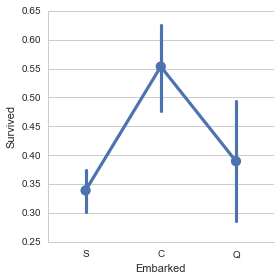

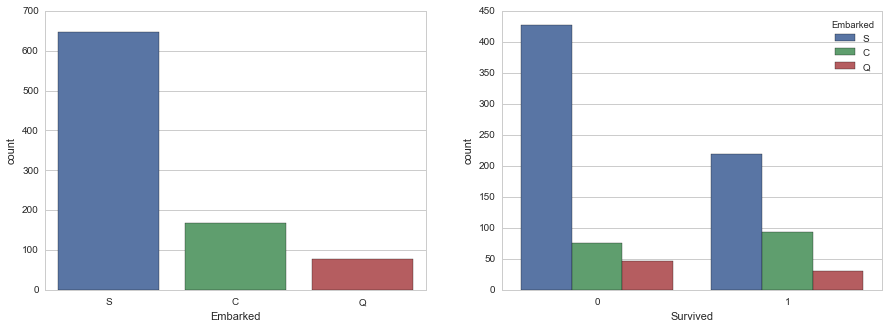

In [39]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")
sns.factorplot('Embarked','Survived',data=train_data)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot('Embarked',data=train_data,ax=axis1)
sns.countplot('Survived',hue='Embarked',data=train_data,ax=axis2 )


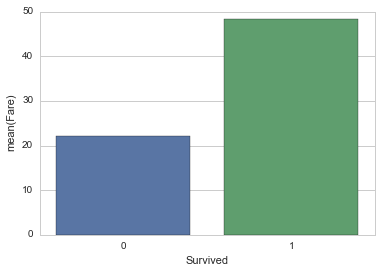

In [40]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
train_fare = train_data[['Fare','Survived']].groupby(['Survived'],as_index=False).mean()
sns.barplot('Survived','Fare',data=train_fare)

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


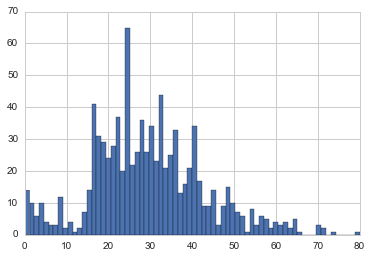

In [41]:
train_age_avg = train_data['Age'].mean()
train_age_std = train_data['Age'].std()
train_age_nan = train_data['Age'].isnull().sum()

test_age_avg = test_data['Age'].mean()
test_age_std = test_data['Age'].std()
test_age_nan = test_data['Age'].isnull().sum()

rand_1 = np.random.randint(train_age_avg - train_age_std, train_age_avg + train_age_std, size = train_age_nan)
rand_2 = np.random.randint(test_age_avg - test_age_std, test_age_avg + test_age_std, size = test_age_nan)

train_data["Age"][np.isnan(train_data["Age"])] = rand_1
test_data["Age"][np.isnan(test_data["Age"])] = rand_2

train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

train_data['Age'].hist(bins=70)


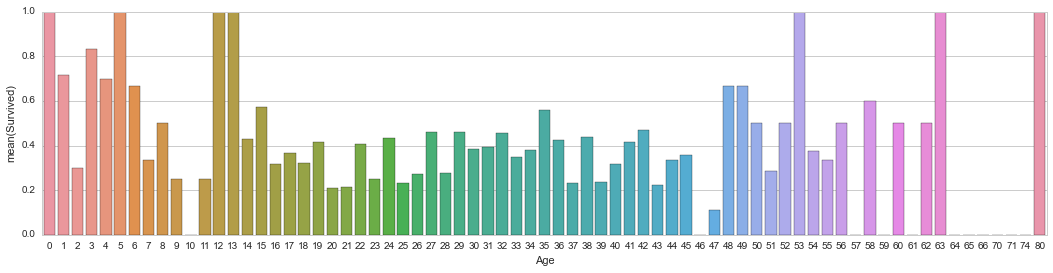

In [42]:
average_age = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.barplot(x='Age', y='Survived', data=average_age)